# PromptChaining Workflow

In [1]:
# !pip install langchain langgraph typing

In [2]:
# !pip install -U langchain langchain-openai

In [3]:
# Importing necessary libraries 

from langgraph.graph import StateGraph, START, END # To created Graph
from langchain.chat_models import init_chat_model # To interact with Models
from typing import TypedDict, List # To create Struct for Graph State
from dotenv import load_dotenv # To load the env variables

load_dotenv()

True

In [4]:
# Creating a Struct using TypedDict to store the state of graph

class BlogState(TypedDict):

    topic : "str"
    outline : "str"
    blog : "str"
    tags : list[str] = []


In [5]:
# Creating just to expirement will use this to pass as a parameter to the get_blog_func function 

# Create an object of init_chat_model class
model = init_chat_model("gpt-5-nano")

In [6]:
# Defining the get_outline_func for the node 1 

def get_outline_func(state : BlogState) -> BlogState:
    
    # I am extracting the topic that the user will provide as input and it will get stored in struct - BlogState
    topic = state["topic"]

    # Once I have extracted the topic - I will draft a prompt here to pass it to model ( Note : I can take prompt as an input too - It can provide flexibility but also can cause issue in quality of output
    prompt = f"Create an outline for this topic = {topic}, Do not use markdown, headings, or extra formatting. - Just output the outline"

    # Now I can pass the prompt to model - but how I can call model here inside the function
    # that's the reason we imported langchain.chat_model 
    # Create an object of init_chat_model class
    model = init_chat_model("gpt-5-nano")

    # I can use the the instance "model" to call function inside the init_chat_model()
    response = model.invoke(prompt)

    # "response" will give a raw response form the invoke model along with other attributes, I just want the response to my prompt not other metadata as of now
    answer = response.content

    # saving the answer to state of graph - updating the state
    state["outline"] = answer

    return state

In [7]:
# Defining the "get_blog_func" for the node 2

def get_blog_func(state : BlogState, model = model) -> BlogState:

    # If we are calling this function, we already must have topic and outline 
    # getting the topic and outline to pass into the next prompt to create the blog 
    topic = state["topic"]
    outline = state["outline"]

    # now we got the parameters , let's create the prompt
    prompt = f"Create a detailed and factually  for this topic = {topic} for this outline = {outline}, Do not use markdown, headings, emoji, icons or extra formatting. - Just output the blog - Ready to post"

    # now passing this prompt to model
    response = model.invoke(prompt)

    # I can use the the instance "model" to call function inside the init_chat_model()
    response = model.invoke(prompt)

    # "response" will give a raw response form the invoke model along with other attributes, I just want the response to my prompt not other metadata as of now
    answer = response.content

    # saving the answer to state of graph - updating the state
    state["blog"] = answer

    return state

In [8]:
# Defining the graph 

# Let's see what's happening here
"""
1. Using "StateGraph" prebuilt class to create an instance of the same class 
2. Passing "BlogState" as a Argument
"""
blog_graph = StateGraph(BlogState)

# Adding Nodes
blog_graph.add_node("get_outline_node", get_outline_func)
blog_graph.add_node("get_blog_node", get_blog_func)

# Adding Edges
blog_graph.add_edge(START, "get_outline_node")
blog_graph.add_edge("get_outline_node", "get_blog_node")
blog_graph.add_edge("get_blog_node", END)

# Compiling the Graph
workflow = blog_graph.compile()

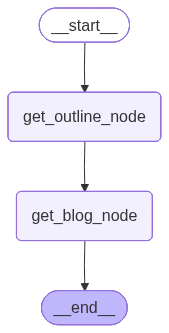

In [9]:
workflow

In [12]:
input_state = { "topic":"Quantum Computing & Generative AI"}

final_state = workflow.invoke(input_state)

In [27]:
from IPython.display import JSON
JSON(final_state, expanded=True)  # collapsed by default

<IPython.core.display.JSON object>

In [20]:
from pprint import pprint

pprint(final_state)

{'blog': '- Core concepts\n'
         '  - Quantum computing fundamentals: Quantum computing rests on the '
         'idea that information can be encoded in quantum bits, or qubits, '
         'which unlike classical bits can exist in superpositions of 0 and 1. '
         'This enables parallel exploration of many states. Entanglement links '
         'qubits so that the state of one qubit depends on others, enabling '
         'correlations that have no classical counterpart. The gate model uses '
         'quantum gates to manipulate qubits, building circuits that implement '
         'computations. Real devices contend with noise from decoherence, '
         'imperfect gates, and readout errors, which motivates error '
         'correction and fault-tolerant designs. Error correction in practice '
         'introduces substantial overhead, typically requiring many physical '
         'qubits to protect a single logical qubit. Understanding the balance '
         'between physical h

In [25]:
from rich.console import Console
from rich.theme import Theme
from rich.json import JSON

custom_theme = Theme({
    "json.key": "red",
    "json.str": "green",
    "json.number": "yellow",
    "json.bool": "magenta",
    "json.null": "cyan"
})

console = Console(theme=custom_theme)
console.print(JSON.from_data(final_state))

{
  "topic": "Quantum Computing & Generative AI",
  "outline": "- Core concepts\n  - Quantum computing fundamentals: qubits, superposition, entanglement, gate model,
noise, error correction\n  - Generative AI fundamentals: models, training, objective functions, diffusion, 
transformers, VAEs, GANs\n  - Quantum-inspired and hybrid approaches: quantum-inspired algorithms, tensor networks,
and related ideas\n- Technical foundations\n  - Hardware landscape: superconducting qubits, trapped ions, photonic 
approaches, error correction overhead\n  - Quantum algorithms relevant to generative tasks: quantum diffusion, 
quantum neural networks, variational quantum circuits, amplitude encoding, quantum sampling\n  - Data encoding and 
readout: feature maps, encoding schemes, measurement considerations\n  - Hybrid quantum-classical training loops: 
parameter-shift rules, backpropagation through quantum circuits, optimization strategies\n  - Software stacks and 
tooling: libraries and frameworks, hardware access models\n- Intersection areas\n  - Potential speedups and quantum
advantages for generative AI\n  - Quantum data generation and simulation to augment training data\n  - 
Quantum-assisted optimization for training generative models\n  - Using quantum circuits as priors or components 
within generative architectures\n- Applications by domain\n  - Drug discovery and materials science\n  - Finance, 
logistics, and optimization problems\n  - Creative and design fields: art, music, graphics\n  - Natural language 
processing and multimodal generation with quantum components\n- Methodologies and benchmarks\n  - Appropriate 
datasets and benchmarks for quantum ML and generative tasks\n  - Evaluation metrics under quantum and classical 
resource constraints\n  - Simulation-based vs. real-hardware benchmarking\n  - Metrics for generative quality, 
efficiency, and quantum resource usage\n- Challenges and limitations\n  - Hardware noise, decoherence, error rates,
and error correction costs\n  - Scalability, qubit connectivity, crosstalk\n  - Data encoding bottlenecks and 
overhead\n  - Training instability and barren plateaus in quantum circuits\n  - Reproducibility and portability 
across different quantum platforms\n- Safety, ethics, and governance\n  - Reliability, interpretability, and 
controllability of quantum-assisted generators\n  - Bias, fairness, and potential misuse of generated content\n  - 
Intellectual property, dual-use concerns, and licensing\n  - Standards, interoperability, and regulatory 
considerations\n- Roadmap and future outlook\n  - Near-term milestones in the NISQ era\n  - Medium-term prospects 
with fault-tolerant quantum computing\n  - Ecosystem development: software, hardware access, education\n  - 
Collaboration between quantum computing and AI communities\n- Case studies and experiments\n  - Small-scale 
demonstrations and their outcomes\n- Practical guidance for teams\n  - Selecting stacks, cloud providers, and 
hardware access\n  - Integrating quantum components into ML pipelines\n  - Project planning, risk assessment, and 
budgeting\n- Education and workforce\n  - Skills development, interdisciplinary training, and curriculum 
recommendations",
  "blog": "- Core concepts\n  - Quantum computing fundamentals: Quantum computing rests on the idea that 
information can be encoded in quantum bits, or qubits, which unlike classical bits can exist in superpositions of 0
and 1. This enables parallel exploration of many states. Entanglement links qubits so that the state of one qubit 
depends on others, enabling correlations that have no classical counterpart. The gate model uses quantum gates to 
manipulate qubits, building circuits that implement computations. Real devices contend with noise from decoherence,
imperfect gates, and readout errors, which motivates error correction and fault-tolerant designs. Error correction 
in practice introduces substantial overhead, typically requiring many physical qubits to protect a